# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [11]:
# !pip install praw matplotlib wordcloud textblob pandas

In [48]:
# !conda install -c conda-forge nltk -y

In [12]:
import praw
import pandas as pd
import credentials


In [13]:
praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

In [14]:
client_id = 'lDFy6Nt5neJDkPmdtysrhw'
client_secret = 'm8rDDrEaZfbQz9dKnPpQPJ8-7L45vA'
user_agent = 'MSDS600 SMD'

reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

In [15]:
co_subreddit = reddit.subreddit('Gemini').top(limit=10)


In [16]:
for post in co_subreddit:
    print(post.title, post.score)

Request to list Nano 478
The twins need to be held responsible 368
Announcing The Successful Resolution of Earn 345
Ira Financial and Gemini 312
After weeks of no response from Gemini, I decided to ask Tyler Winklevoss for help on one of his tweets. He messaged me 10 minutes later, and within 12 hours my issue was fixed. Thank you Tyler. 243
Congratulations!! Feel so unreal after 1.5 years. Thank you!!!! 221
SETTLEMENT HAS BEEN APPROVED BY JUDGE LANE  221
Email pertaining to the new updates 213
LIKE THIS POST IF YOU THINK GEMINI SHOULD GIVE US BACK OUR EARN PLUS INTEREST! 208
Distribution Available! 183


In [17]:
list(co_subreddit)

[]

In [18]:
post

Submission(id='1d3d2s6')

In [19]:
post.score

183

In [20]:
post.title


'Distribution Available!'

In [21]:
sub_url = post.permalink
print(sub_url)

/r/Gemini/comments/1d3d2s6/distribution_available/


In [22]:
base_url = 'https://www.reddit.com/r/india/comments/1j3ir5h/price_differences_for_users_with_black_membership/'
print(base_url)

https://www.reddit.com/r/india/comments/1j3ir5h/price_differences_for_users_with_black_membership/


In [23]:
complete_url = base_url+sub_url

print(complete_url)

https://www.reddit.com/r/india/comments/1j3ir5h/price_differences_for_users_with_black_membership//r/Gemini/comments/1d3d2s6/distribution_available/


In [26]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


co_subreddit = reddit.subreddit('Gemini').top(limit=None)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [25]:
co_df = pd.DataFrame(reddit_data)

In [27]:
co_df

,title,link,author,n_comments,score,text
0,Security hold on BTC for over a month,/r/Gemini/comments/1j3hm24/security_hold_on_bt...,av8er1978,1,1,"I've emailed supp multiple times, I've sent th..."
1,Staking on Gemini,/r/Gemini/comments/1j3geo5/staking_on_gemini/,FrankieBaggaDonuts,0,1,Anyone know if we'll be getting staking on Gem...
2,Any promo codes?,/r/Gemini/comments/1j3970s/any_promo_codes/,Lucky-Honeydew4289,6,0,"Hello, does anyone have any promo code for new..."
3,Ask r/Gemini - Monthly Discussion Thread March...,/r/Gemini/comments/1j339d9/ask_rgemini_monthly...,Gemini_Gianna,0,0,Welcome to r/Gemini \- Community Guidelines an...
4,How long after new login location can I send c...,/r/Gemini/comments/1j2vxl2/how_long_after_new_...,ZeroGirlsSB,0,0,"Not really and urgent question, just curious"
...,...,...,...,...,...,...
887,Are we receiving the interest for the last cou...,/r/Gemini/comments/1cuyoib/are_we_receiving_th...,Remarkable3897,48,9,
888,Gemini update,/r/Gemini/comments/1cumf0p/gemini_update/,Pizzaholic-,67,71,We did it everyone congrats!!!
889,Memorandum of Decision,/r/Gemini/comments/1cujxtu/memorandum_of_decis...,Previous_Pension_309,9,11,More literature of how our funds have come tog...
890,Donut update 5/17/24,/r/Gemini/comments/1cuffcg/donut_update_51724/,No_Spirit_3173,44,5,"Confirmation of the Plan remains under review,..."


# Saving data to sqlite

In [29]:
import sqlite3

con = sqlite3.connect("co_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

892

In [30]:
co_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
co_df_check

,title,link,author,n_comments,score,text
0,Security hold on BTC for over a month,/r/Gemini/comments/1j3hm24/security_hold_on_bt...,av8er1978,1,1,"I've emailed supp multiple times, I've sent th..."
1,Staking on Gemini,/r/Gemini/comments/1j3geo5/staking_on_gemini/,FrankieBaggaDonuts,0,1,Anyone know if we'll be getting staking on Gem...
2,Any promo codes?,/r/Gemini/comments/1j3970s/any_promo_codes/,Lucky-Honeydew4289,6,0,"Hello, does anyone have any promo code for new..."
3,Ask r/Gemini - Monthly Discussion Thread March...,/r/Gemini/comments/1j339d9/ask_rgemini_monthly...,Gemini_Gianna,0,0,Welcome to r/Gemini \- Community Guidelines an...
4,How long after new login location can I send c...,/r/Gemini/comments/1j2vxl2/how_long_after_new_...,ZeroGirlsSB,0,0,"Not really and urgent question, just curious"
...,...,...,...,...,...,...
887,Are we receiving the interest for the last cou...,/r/Gemini/comments/1cuyoib/are_we_receiving_th...,Remarkable3897,48,9,
888,Gemini update,/r/Gemini/comments/1cumf0p/gemini_update/,Pizzaholic-,67,71,We did it everyone congrats!!!
889,Memorandum of Decision,/r/Gemini/comments/1cujxtu/memorandum_of_decis...,Previous_Pension_309,9,11,More literature of how our funds have come tog...
890,Donut update 5/17/24,/r/Gemini/comments/1cuffcg/donut_update_51724/,No_Spirit_3173,44,5,"Confirmation of the Plan remains under review,..."


# Basic EDA on our data

- wordcount plots
- bar plot
- numeric eda plots

<Axes: ylabel='Frequency'>

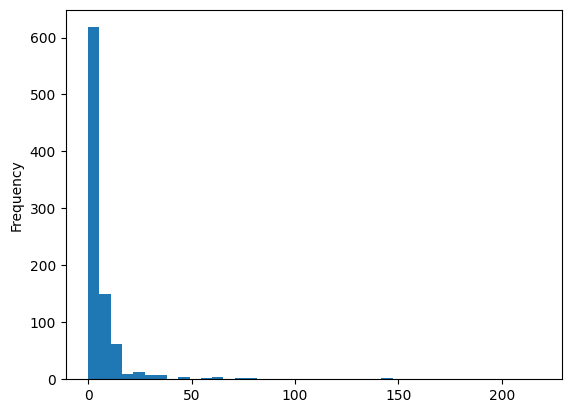

In [31]:
co_df['score'].plot.hist(bins=40)

In [36]:
co_df[co_df['score'] > 150]

,title,link,author,n_comments,score,text
822,I cried,/r/Gemini/comments/1d3fadz/i_cried/,Ok_Plan_2461,37,154,I can finally put my down payment on my house ...
834,Congratulations!! Feel so unreal after 1.5 yea...,/r/Gemini/comments/1d3dllb/congratulations_fee...,Realistic_Bee379,92,218,Congratulations to you all!!! Feel so unreal b...
838,Distribution Available!,/r/Gemini/comments/1d3d2s6/distribution_availa...,Naive-Duck-1122,213,184,Just logged in (had GUSD) and was just able to...


In [38]:
co_df[co_df['score'] > 150]['link'].to_list()

['/r/Gemini/comments/1d3fadz/i_cried/',
 '/r/Gemini/comments/1d3dllb/congratulations_feel_so_unreal_after_15_years/',
 '/r/Gemini/comments/1d3d2s6/distribution_available/']

<Axes: >

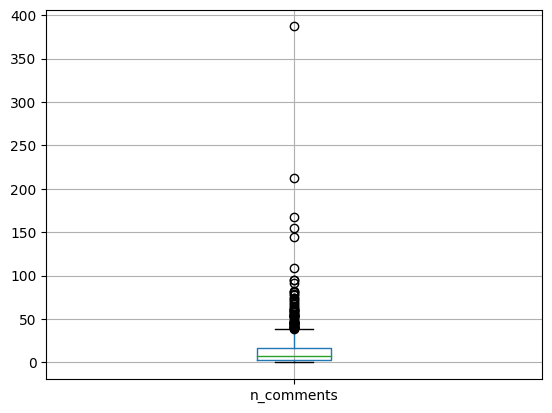

In [42]:
co_df.boxplot('n_comments')

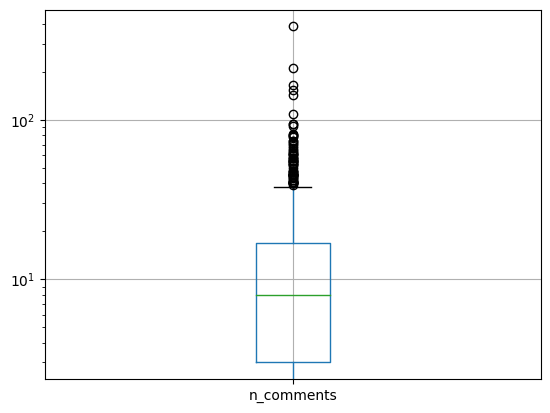

In [40]:
import matplotlib.pyplot as plt
co_df.boxplot('n_comments')
plt.yscale('log')

<Axes: xlabel='score', ylabel='n_comments'>

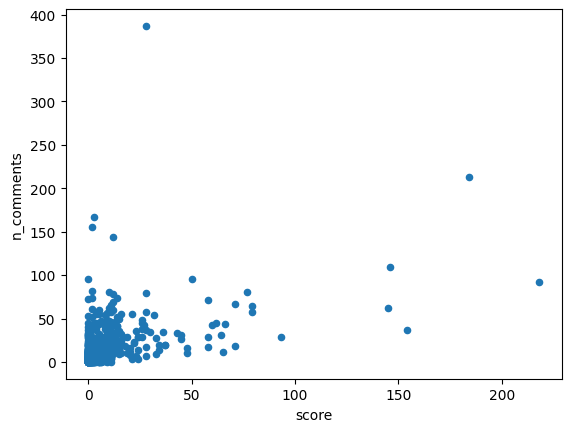

In [43]:
co_df.plot.scatter(x='score', y='n_comments')

<Axes: xlabel='author'>

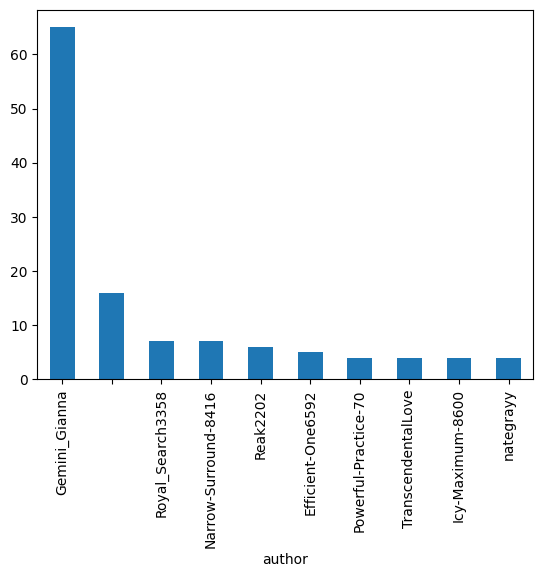

In [44]:
co_df['author'].value_counts()[:10].plot.bar()

In [46]:
co_df[co_df['author'] == 'nategrayy']

,title,link,author,n_comments,score,text
556,Polygon Integration,/r/Gemini/comments/1fnnknm/polygon_integration/,nategrayy,2,7,"There are hundreds of cases across Reddit, twi..."
658,Polygon Integration,/r/Gemini/comments/1ef2zfj/polygon_integration/,nategrayy,3,5,Any updates on Polygon Network Integration? Fr...
664,Polygon Integration,/r/Gemini/comments/1ebybha/polygon_integration/,nategrayy,2,3,Any updates on Polygon Network being integrate...
750,Funds stuck in Limbo.,/r/Gemini/comments/1dezn60/funds_stuck_in_limbo/,nategrayy,11,1,Does anyone know what is stoping Gemini from r...


In [ ]:
import nltk
fd = nltk.FreqDist(' '.join(co_df['title']).split())

fd.most_common(30)

[('Gemini', 235),
 ('to', 198),
 ('my', 125),
 ('the', 105),
 ('on', 89),
 ('a', 80),
 ('I', 77),
 ('account', 76),
 ('for', 73),
 ('and', 70),
 ('is', 66),
 ('in', 60),
 ('of', 58),
 ('-', 44),
 ('not', 43),
 ('Account', 41),
 ('withdraw', 39),
 ('with', 38),
 ('from', 38),
 ('you', 33),
 ('Is', 31),
 ('it', 31),
 ('Security', 30),
 ('hold', 29),
 ('How', 27),
 ('this', 27),
 ('crypto', 26),
 ('withdrawal', 24),
 ('or', 23),
 ('do', 23)]

<Axes: xlabel='Samples', ylabel='Counts'>

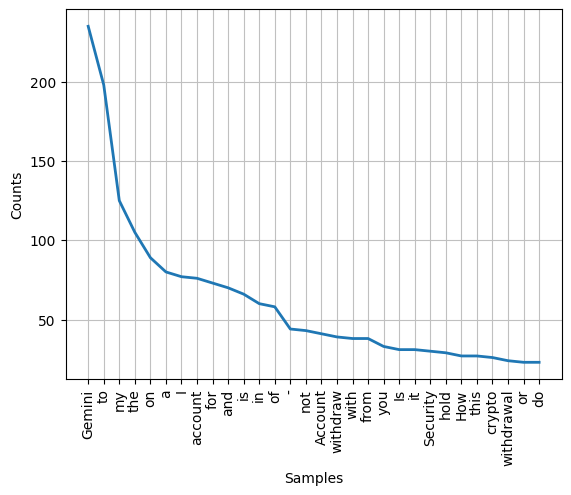

In [50]:
fd.plot(30)

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksaig\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [52]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [53]:
words = ' '.join(co_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [56]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(30)

[('gemini', 259),
 ('account', 118),
 ('security', 49),
 ('hold', 49),
 ('withdraw', 47),
 ('-', 44),
 ('crypto', 38),
 ('help', 37),
 ('card', 34),
 ('please', 32),
 ('credit', 31),
 ('withdrawal', 31),
 ('funds', 27),
 ('earn', 26),
 ('bitcoin', 25),
 ('unable', 23),
 ('anyone', 23),
 ('money', 23),
 ('transfer', 21),
 ("can't", 20),
 ('need', 19),
 ('new', 18),
 ('update', 18),
 ('escalate', 18),
 ('donut', 18),
 ('use', 17),
 ('customer', 16),
 ('still', 16),
 ('get', 16),
 ('froze', 16)]

<Axes: xlabel='Samples', ylabel='Counts'>

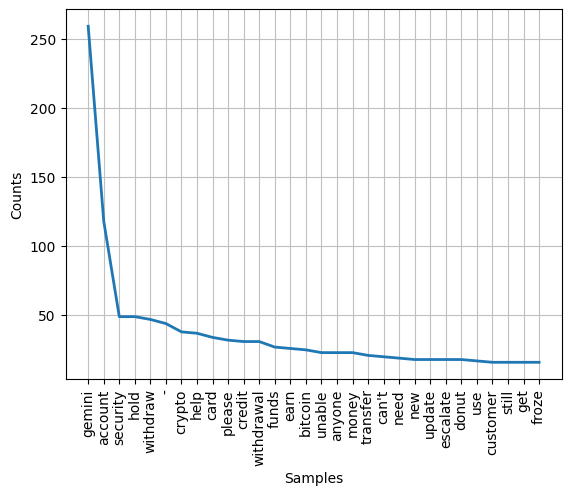

In [57]:
cleaned_fd.plot(30)

# Analysis

Write a short analysis of the process and results here.


We use praw (Python Reddit API Wrapper) to fetch posts in the r/Gemini subreddit.
Fetches the primary information like title, author, score, comment number, and text content.
Data Storage

Than Stores the fetched data into an SQLite3 database.
Stores data in a table named "posts".
Exploratory Data Analysis (EDA)

Histograms: Plots the distribution of scores.

Boxplots: Plots the spread of comments with a logarithmic scale.

Scatter Plot: Analyzes correlation between number of comments and score.

Bar Charts: Presents most common Reddit authors by frequency of posts.

Word Frequency Analysis: Uses nltk to determine most common words used in post titles.

Stopword Removal & Cleaning: Eliminates common English words to constrain word frequency results.

Results & Insights

Posts that have a high score garner more engagement.
Some writers publish more frequently.
Common words that are used within the titles refer to popular threads on the subreddit.